In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from pathlib import Path

script_dir = Path.cwd() 
df = pd.read_csv(script_dir.parent / '4 - Dataset' / "weld_data_preprocessing1.0.csv")

In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1242 entries, 0 to 1241
Data columns (total 39 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Carbon concentration (weight%)                1242 non-null   float64
 1   Silicon concentration (weight%)               1242 non-null   float64
 2   Manganese concentration (weight%)             1242 non-null   float64
 3   Sulphur concentration (weight%)               1242 non-null   float64
 4   Phosphorus concentration (weight%)            1242 non-null   float64
 5   Oxygen concentration (%)                      1242 non-null   float64
 6   Titanium concentration (%)                    1242 non-null   float64
 7   Nitrogen concentration (%)                    1242 non-null   float64
 8   Current (A)                                   1242 non-null   float64
 9   Voltage (V)                                   1242 non-null   f

Text(0, 0.5, 'Cumulative explained variance')

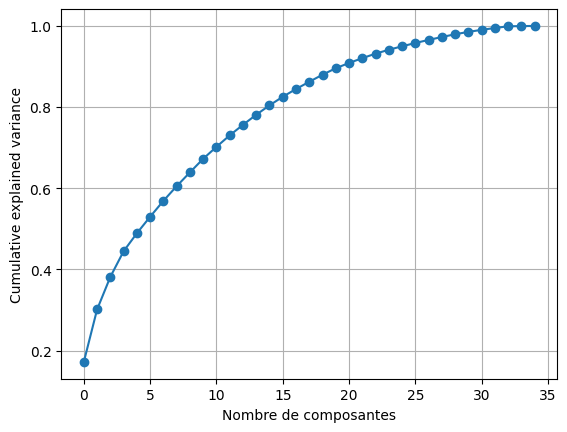

In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

def scale(X,scaler=MinMaxScaler()) :
    scaler = scaler
    X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    return X_scaled

X = df.iloc[:,:35]
X_norm = scale(X)

algoPCA = PCA().fit(X_norm)
plt.plot(np.cumsum(algoPCA.explained_variance_ratio_), marker = 'o')
plt.grid()
plt.xlabel('Nombre de composantes')
plt.ylabel('Cumulative explained variance')
